In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sc
import scipy.stats as stats
import scipy.stats
import seaborn as sns

## Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [2]:
# считывание файла
df1 = pd.read_csv('ex1.csv')

In [3]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа
# Аргумент errors='coerce'заменит все нечисловые значения на NaN.
numeric_df1 = df1.apply(pd.to_numeric, errors='coerce')
print(numeric_df1)

# Затем мы можем проверить, есть ли какие-либо NaN значения в DataFrame. 
# Если есть, это означает, что исходный DataFrame имел нечисловые значения.
is_all_numeric = not numeric_df1.isnull().values.any()
print(is_all_numeric)

             x           y
0    40.221367   28.074933
1    41.383916  105.179581
2    50.157355  162.764514
3    20.647573  -51.647274
4    50.657121  126.580772
..         ...         ...
495  50.465065  175.729406
496  20.787561   36.536460
497  35.237595   64.302142
498  54.741921  365.065810
499  22.438634   23.171536

[500 rows x 2 columns]
True


C:\Users\yam67\AppData\Local\Temp\ipykernel_11808\2693246442.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['y'], hist=True, kde=True,


Text(0, 0.5, 'y')

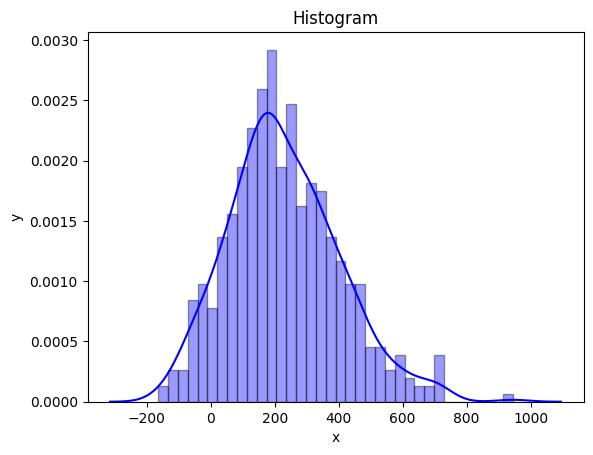

In [4]:
# построение гистограмм распределения

x = df1[['x']].values
y = df1[['y']].values

# df1.groupby('y').y.count()
# df1['y'].hist()


# seaborn histogram
sns.distplot(df1['y'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('y')

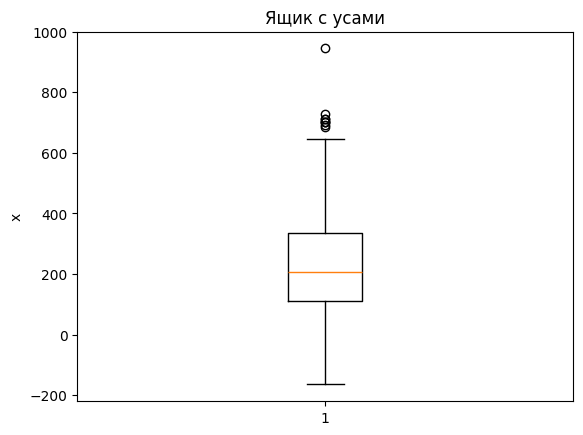

In [5]:
# построение "ящика с усами" для изучения выбросов
# Построение ящика с усами
plt.boxplot(y)
plt.ylabel('x')
plt.title('Ящик с усами')
plt.show()

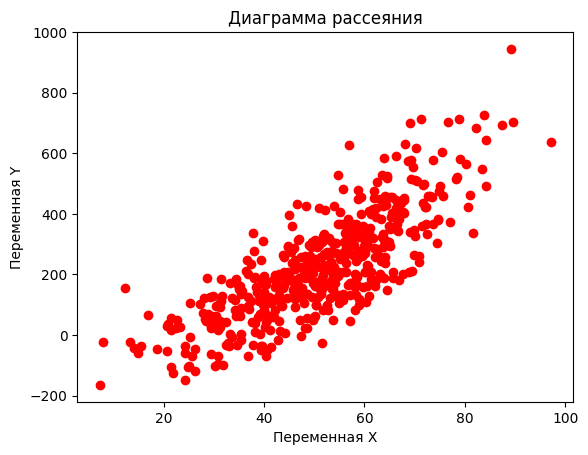

In [6]:
# построение диаграммы рассеяния
plt.scatter(x, y, color='red')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Диаграмма рассеяния')
plt.show()

In [7]:
# Расчет коэффициента корреляции Пирсона
correlation_matrix = df1.corr()
print(correlation_matrix)

          x         y
x  1.000000  0.803232
y  0.803232  1.000000


In [8]:
# Расчет коэффициента корреляции Пирсона
res = scipy.stats.pearsonr(x.flatten(), y.flatten())  # Используем .flatten(), чтобы привести массивы к одномерным
print(res)

PearsonRResult(statistic=0.8032321850936793, pvalue=3.973859056368235e-114)


In [9]:
# тест Шапиро-Уилка на нормальность данных
from scipy import stats
stats_x, p_value_x = stats.shapiro(x)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x}, p-value = {p_value_x}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')

# Принятие решения на основе p-значения
alpha = 0.05
if p_value_x < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

Для х: статистика = 0.9968433456633599, p-value = 0.44262654870604984
Для y: статистика = 0.9845460467322775, p-value = 3.709045667924733e-05
Нельзя отклонить нулевую гипотезу о нормальности для Х
Выборка Y не нормальна


In [10]:
# Вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков

In [11]:
# Обе переменные численные;
# Данные включают не значительные выбросы выбросы;
# На графике дианграмыы рассеяния прослеживается линейная зависимость между X и Y ;
# тест Шапиро-Уилка на нормальность данных показал:
# Нельзя отклонить нулевую гипотезу о нормальности для Х
# Считаю целесообразно использовать корреляцию Пирсона.

In [12]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона
print('расчет коэффициента Пирсона:')
correlation_matrix = df1.corr()
print(correlation_matrix)
print()
res = scipy.stats.pearsonr(x.flatten(), y.flatten())  # Используем .flatten(), чтобы привести массивы к одномерным
print(res)
print()

# расчет t-критерия
alpha = 0.05
n = len(x)
r, p_value = stats.pearsonr(x.flatten(), y.flatten())
print(r, p_value)

# Принятие решения на основе критического значения t
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t-score:', t_score)
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Critical t-Score:',t_critical)
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

# Принятие решения на основе p-значения
p_value = (1 - stats.t.cdf(np.abs(t_score), df = n-2)) * 2
print('P-Value :',p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")


# вывод о степени корреляции величин и статистической значимости их взаимосвязи


расчет коэффициента Пирсона:
          x         y
x  1.000000  0.803232
y  0.803232  1.000000

PearsonRResult(statistic=0.8032321850936793, pvalue=3.973859056368235e-114)

0.8032321850936793 3.973859056368235e-114
t-score: 30.092129139493768
Critical t-Score: 1.9647389829672648
Связь статистически значима
P-Value : 0.0
Связь статистически значима


## Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [13]:
# считывание файла
df2 = pd.read_csv('ex2.csv')

In [14]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
# Аргумент errors='coerce'заменит все нечисловые значения на NaN.
numeric_df1 = df1.apply(pd.to_numeric, errors='coerce')
print(numeric_df1)

# Затем мы можем проверить, есть ли какие-либо NaN значения в DataFrame. 
# Если есть, это означает, что исходный DataFrame имел нечисловые значения.
is_all_numeric = not numeric_df1.isnull().values.any()
print(is_all_numeric)


             x           y
0    40.221367   28.074933
1    41.383916  105.179581
2    50.157355  162.764514
3    20.647573  -51.647274
4    50.657121  126.580772
..         ...         ...
495  50.465065  175.729406
496  20.787561   36.536460
497  35.237595   64.302142
498  54.741921  365.065810
499  22.438634   23.171536

[500 rows x 2 columns]
True


C:\Users\yam67\AppData\Local\Temp\ipykernel_11808\1334290055.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['y'], hist=True, kde=True,


Text(0, 0.5, 'y')

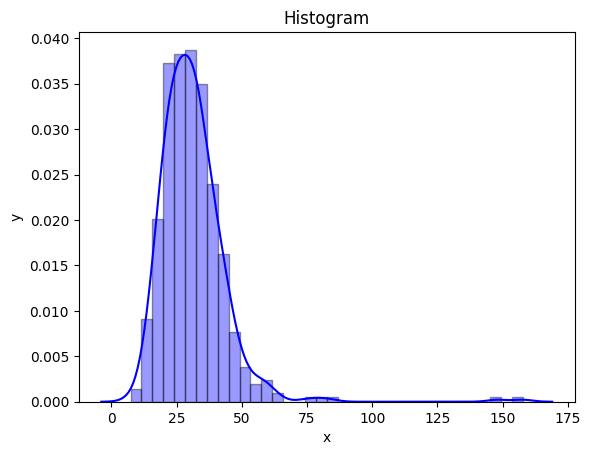

In [15]:
# построение гистограмм распределения

x = df2[['x']].values
y = df2[['y']].values

# df1.groupby('y').y.count()
# df1['y'].hist()


# seaborn histogram
sns.distplot(df2['y'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('y')

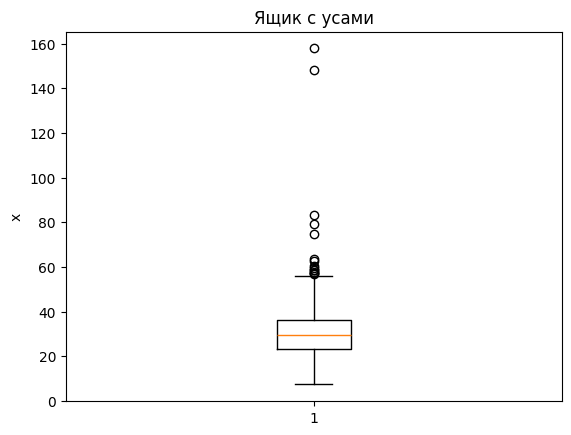

In [16]:
# построение "ящика с усами" для изучения выбросов
# Построение ящика с усами
plt.boxplot(y)
plt.ylabel('x')
plt.title('Ящик с усами')
plt.show()

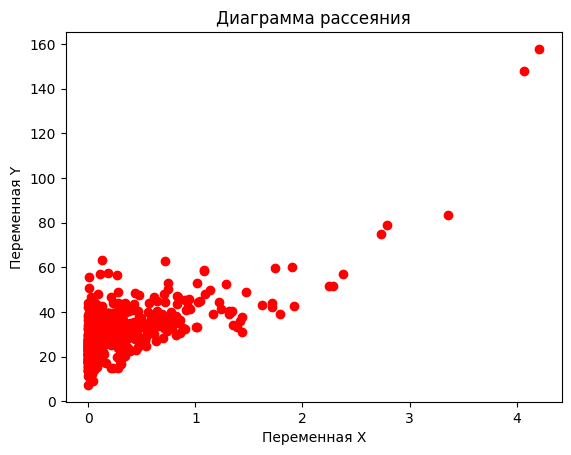

In [17]:
# построение диаграммы рассеяния
plt.scatter(x, y, color='red')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Диаграмма рассеяния')
plt.show()

In [18]:
# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков

In [19]:
# Все элементы численного типа;
# тест Шапиро-Уилка на нормальность данных показал, что Выборка X и Y не нормальна
# диаграммы рассеяния связь между переменными является нелинейной, монотонной
# считаю целесообразно использование корреляции Спирмена.

In [20]:
# тест Шапиро-Уилка на нормальность данных
from scipy import stats
stats_x, p_value_x = stats.shapiro(x)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x}, p-value = {p_value_x}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')

# Принятие решения на основе p-значения
if p_value_x < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

Для х: статистика = 0.5981007136989439, p-value = 2.0712493942955445e-32
Для y: статистика = 0.769667359555126, p-value = 6.817325798443371e-26
Выборка X не нормальна
Выборка Y не нормальна


In [21]:
# расчет коэффициента Пирсона
alpha = 0.05
r, p_value = stats.pearsonr(x.flatten(), y.flatten())
print(r, p_value)

# Принятие решения на основе критического значения t
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t-score:',t_score)
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Critical t-Score:',t_critical)
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

# Принятие решения на основе p-значения
p_value = (1 - stats.t.cdf(np.abs(t_score), df = n-2)) * 2
print('P-Value :',p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")


0.7333384700543454 1.7106115708250144e-85
t-score: 24.07117378388725
Critical t-Score: 1.9647389829672648
Связь статистически значима
P-Value : 0.0
Связь статистически значима


In [22]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена
# расчет t-критерия
n = len(x)
alpha = 0.05
r, p_value = stats.spearmanr(x, y)
print(r, p_value)
# Принятие решения на основе критического значения t
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t-score:',t_score)
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Critical t-Score:',t_critical)
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

# вывод о степени корреляции величин и статистической значимости их взаимосвязи


0.6170866283465134 8.471901488365329e-54
t-score: 17.500235697828852
Critical t-Score: 1.9647389829672648
Связь статистически значима


## Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [23]:
# считывание файла
df3 = pd.read_csv('ex3.csv')

In [24]:
# Описательная статистика исходных данных средствами библиотеки statsmodels
from statsmodels.stats.descriptivestats import Description
a_level = 0.05
result = Description(
    df3,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=a_level,
    use_t=True)
display(result.summary())

nobs,20.0,20.0
missing,0.0,0.0
mean,0.6604296059187781,4.195927953651669
std_err,0.8833847731211888,2.0975223370482627
upper_ci,2.509375185359412,8.58609265975232
lower_ci,-1.1885159735218562,-0.19423675244898142
std,3.9506168059744144,9.380405059928282
iqr,5.476363285367496,13.018563152045758
mad,3.2619739472909344,7.781333819078137
coef_var,5.981889319571593,2.2355972656214513
range,14.148659531626725,33.967602208013226


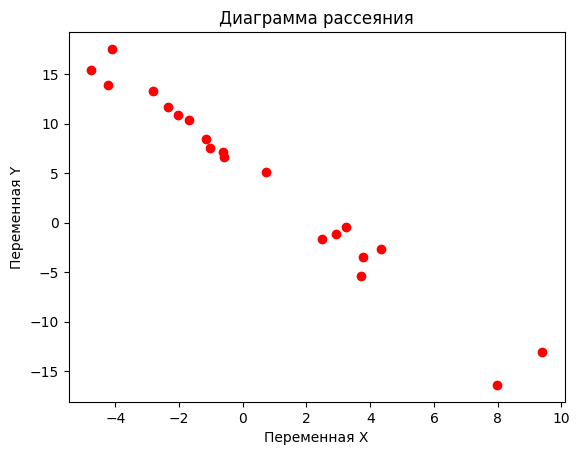

-0.9851417834585036 3.1764533567697222e-15
P-Value : 0.0
Связь статистически значима
True
Для х: статистика = 0.9385093139137303, p-value = 0.2246846126060067
Для y: статистика = 0.9422195118994715, p-value = 0.264005846869273
Нельзя отклонить нулевую гипотезу о нормальности для Х
Нельзя отклонить нулевую гипотезу о нормальности для Y


In [25]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
x = df3[['x']].values
y = df3[['y']].values
plt.scatter(x, y, color='red')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Диаграмма рассеяния')
plt.show()

# вывод о целесообразности использования корреляции Пирсона
# расчет коэффициента Пирсона
alpha = 0.05
r, p_value = stats.pearsonr(x.flatten(), y.flatten())
print(r, p_value)

# Принятие решения на основе p-значения
p_value = (1 - stats.t.cdf(np.abs(t_score), df = n-2)) * 2
print('P-Value :',p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")


# проверка, что все элементы - численного типа
# Аргумент errors='coerce'заменит все нечисловые значения на NaN.
numeric_df3 = df1.apply(pd.to_numeric, errors='coerce')

# Затем мы можем проверить, есть ли какие-либо NaN значения в DataFrame. 
# возвращает целое число, обозначающее общее количество значений NaN:
df3.isnull().sum().sum()

# Если есть, это означает, что исходный DataFrame имел нечисловые значения.
is_all_numeric = not numeric_df1.isnull().values.any()
print(is_all_numeric)

# тест Шапиро-Уилка на нормальность данных
from scipy import stats
stats_x, p_value_x = stats.shapiro(x)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x}, p-value = {p_value_x}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')

# Принятие решения на основе p-значения
if p_value_x < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")


In [26]:
# считаю целесообразно использование корреляции Пирсона

Для х: статистика = 0.9385093139137303, p-value = 0.2246846126060067
Для y: статистика = 0.9422195118994715, p-value = 0.264005846869273
Нельзя отклонить нулевую гипотезу о нормальности для Х
Нельзя отклонить нулевую гипотезу о нормальности для Y
Коэффициент наклона -2.3391357411141347, сдвиг 5.740762449346206
Коэффициент корреляции -0.9851417834585033, коэффициент детерминации 0.9705043335158007
p-value (из теста Вальда в предположении, что наклон равен нулю) 3.1764533567699384e-15
Ошибка наклона 0.09611685229891045, ошибка сдвига 0.3755103704947338
 Y = 5 + -2.339*X


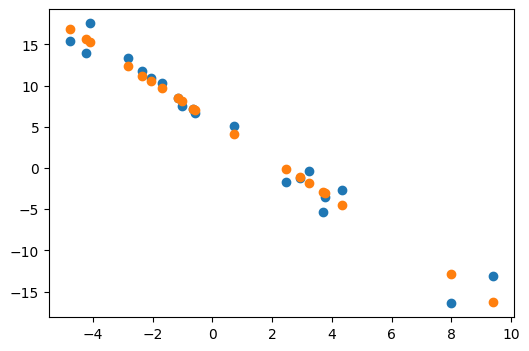

In [27]:
# КРИТЕРИЙ 6

# тест Шапиро-Уилка на нормальность данных
from scipy import stats
stats_x, p_value_x = stats.shapiro(x)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x}, p-value = {p_value_x}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')

# Принятие решения на основе p-значения
if p_value_x < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

# расчет коэффициентов линейной регрессии 
x = df3[['x']].values
y = df3[['y']].values
res = stats.linregress(x.flatten(), y.flatten())
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}')
print(f'p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')
print(f' Y = {int(round(res.intercept, 3))} + {round(res.slope, 3)}*X')

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике

# визуализация прогноза
y_pred = res.intercept + res.slope*x
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
ax.scatter(x, y_pred)
plt.show()

In [28]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации

# import numpy as np
# import statsmodels.api as sm

# Пример данных (X - признаки, y - целевая переменная)
X = x  # Признаки 
y  # Целевая переменная 


# Преобразуем X в столбец, добавляем столбец единичных значений для перехвата (свободного члена)
X = sm.add_constant(X)

# Строим модель линейной регрессии
model = sm.OLS(y, X)
results = model.fit()

# Предсказанные значения
y_pred = results.predict(X)

# Средняя ошибка аппроксимации (A)
A = np.mean(np.abs((y - y_pred))/y)


# Выводим результаты
print(f"Средняя ошибка аппроксимации (A): {A:.3f}")


Средняя ошибка аппроксимации (A): -1.714


In [29]:
# КРИТЕРИЙ 8

# расчет F-критерия

# import numpy as np
# import statsmodels.api as sm
import statsmodels.formula.api as smf

# Пример данных (X - признаки, y - целевая переменная)
X = x  # Признаки 
y  # Целевая переменная 

# Добавляем столбец единичных значений для свободного члена (перехвата)
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)
results = model.fit()

# Получаем F-статистику и p-значение
f_statistic = results.fvalue
f_pvalue = results.f_pvalue

print(f"F-статистика: {f_statistic}")
print(f"P-значение для F-статистики: {f_pvalue}")
print()
print('Интерпретация результатов:')
print('F-статистика: Чем выше F-статистика, тем более значимыми являются независимые переменные в модели.')


# вывод о статистической значимости уравнения в целом

if f_pvalue < 0.05:
    print("Модель статистически значима на уровне доверия 0.95.")
else:
    print("Модель не статистически значима на уровне доверия 0.95.")


F-статистика: 592.2591378853077
P-значение для F-статистики: 3.176453356769872e-15

Интерпретация результатов:
F-статистика: Чем выше F-статистика, тем более значимыми являются независимые переменные в модели.
Модель статистически значима на уровне доверия 0.95.


In [30]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
# расчет доверительных интервалов для параметров и прогноза
from scipy.stats import t
t_coef = abs(t.ppf(alpha/2, len(x)-2))
t_real = abs(t.ppf(res.pvalue/2, len(x)-2))
print(f'Расчетное значение t-критерия: {t_real}, критическое значение t-критерия: {t_coef}')
print(f"slope (95%): {res.slope:.3f} +/- {t_coef*res.stderr:.3f}")
print(f"intercept (95%): {res.intercept:.3f} +/- {t_coef*res.intercept_stderr:.3f}")

# вывод о статистической значимости коэффициентов регрессии

# import numpy as np
# import statsmodels.api as sm

# Пример данных (X - признаки, y - целевая переменная)
X = x  # Признаки
y  # Целевая переменная

# Добавляем столбец единиц для свободного члена
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)  # OLS - Ordinary Least Squares (метод наименьших квадратов)
results = model.fit()

# Выводим статистику модели
print(results.summary())

# Получаем p-value для F-теста
f_p_value = results.f_pvalue

# Интерпретация p-value
alpha = 0.05  # Уровень значимости
if f_p_value < alpha:
    print(f"Модель статистически значима. p-value = {f_p_value:.4f}")
else:
    print(f"Модель статистически не значима. p-value = {f_p_value:.4f}")



# Расчет корреляции
alpha = 0.05
x = df3[['x']].values
y = df3[['y']].values
r, p_value = stats.pearsonr(x.flatten(), y.flatten())
print(f'Коэффициент корреляции = {r}, p_value = {p_value}')
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")
# существует линейная зависимость , коэффициент корреляции статистически значим

# запись диапазона коэффицентов регрессии
res = stats.linregress(x.flatten(), y.flatten())
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}')
print(f'p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')


Mean Absolute Error: 1.218344455222086
Mean Squared Error: 2.4656135254679254
Root Mean Squared Error: 1.5702272209676933
Расчетное значение t-критерия: 24.336374789300606, критическое значение t-критерия: 2.10092204024096
slope (95%): -2.339 +/- 0.202
intercept (95%): 5.741 +/- 0.789
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     592.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           3.18e-15
Time:                        11:01:35   Log-Likelihood:                -37.403
No. Observations:                  20   AIC:                             78.81
Df Residuals:                      18   BIC:                             80.80
Df Model:                           1                                         
Cov

In [31]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x_0 = 6
y_0 = res.intercept + res.slope * x_0
y_r = (y_pred - y)**2
s_r = (y_r.sum()/(len(x)-2))**0.5
delta = s_r*(1+1/len(x)+(x_0-x.mean())**2/(len(x)*x.var()))
print(f"При x_0 = 6: y_0 = {y_0:.3f} +/- {t_coef*delta:.3f}")

При x_0 = 6: y_0 = -8.294 +/- 145.685


## Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [32]:
# считывание файла
df4 = pd.read_csv('ex4.csv')

In [33]:
df4.head()

,x1,x2,y
0,13.637973,12.069977,-9.893143
1,-6.443507,23.970769,137.003862
2,9.361274,14.760979,20.571415
3,1.619709,24.043092,93.407384
4,-1.050608,21.837863,95.041511


In [34]:
x1 = df4[['x1']].values
x2 = df4[['x2']].values
y = df4[['y']].values

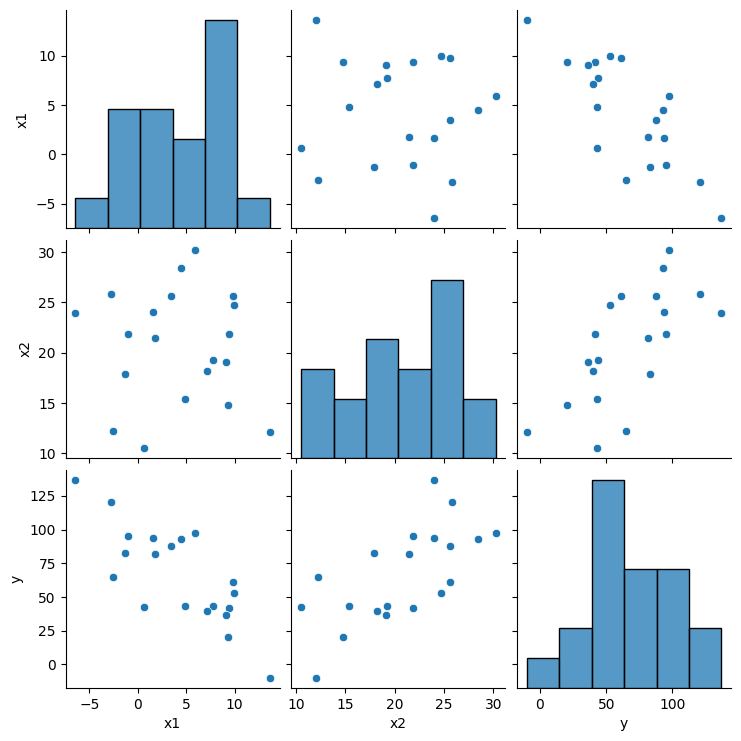

In [35]:
sns.pairplot(df4)

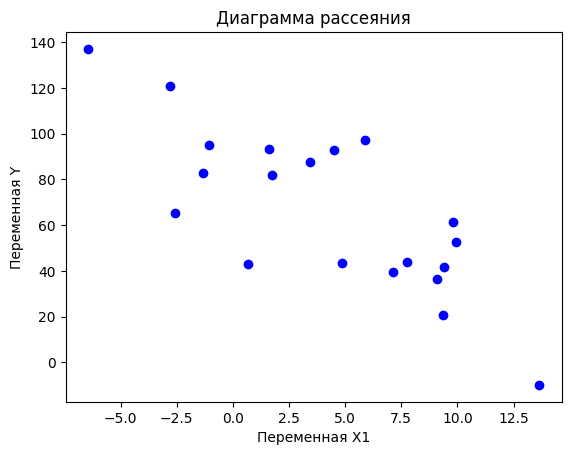

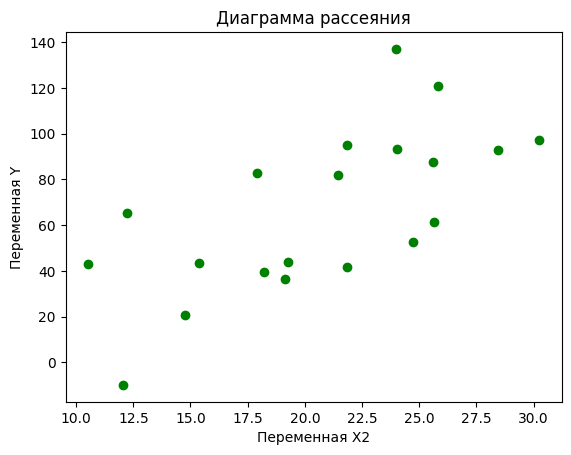

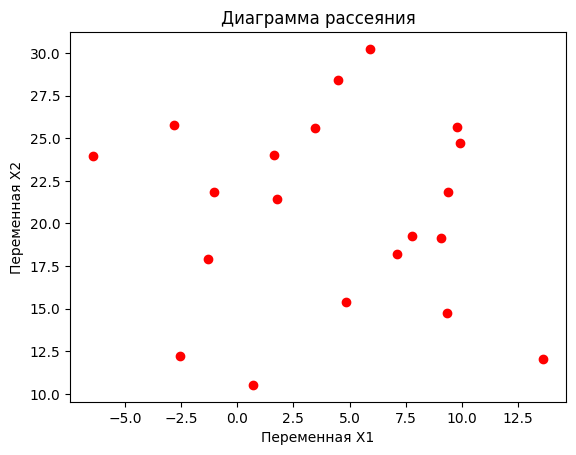

Для х: статистика = 0.9660436986026726, p-value = 0.6701242093173441
Для y: статистика = 0.9705761121380394, p-value = 0.7669952066021066
Нельзя отклонить нулевую гипотезу о нормальности для Х1
Нельзя отклонить нулевую гипотезу о нормальности для Y
Для х: статистика = 0.9644326992692949, p-value = 0.6356447178653012
Для y: статистика = 0.9705761121380394, p-value = 0.7669952066021066
расчет коэффициентов корреляции:           x1        x2         y
x1  1.000000 -0.075013 -0.787807
x2 -0.075013  1.000000  0.669834
y  -0.787807  0.669834  1.000000
*************
Коэффициент корреляции, x1/x2 = -0.075
вывод нет необходимости устранения какого-либо фактора


In [36]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.scatter(x1, y, color='blue')
plt.xlabel('Переменная X1')
plt.ylabel('Переменная Y')
plt.title('Диаграмма рассеяния')
plt.show()

plt.scatter(x2, y, color='green')
plt.xlabel('Переменная X2')
plt.ylabel('Переменная Y')
plt.title('Диаграмма рассеяния')
plt.show()

plt.scatter(x1, x2, color='red')
plt.xlabel('Переменная X1')
plt.ylabel('Переменная X2')
plt.title('Диаграмма рассеяния')
plt.show()


# вывод о корректности использования модели множественной регрессии


# тест Шапиро-Уилка на нормальность данных
from scipy import stats
stats_x1, p_value_x1 = stats.shapiro(x1)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x1}, p-value = {p_value_x1}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')
# Принятие решения на основе p-значения
if p_value_x1 < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х1")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

stats_x2, p_value_x2 = stats.shapiro(x2)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x2}, p-value = {p_value_x2}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')
# Принятие решения на основе p-значения
# if p_value_x1 < alpha:
#     print("Выборка X не нормальна")
# else:
#     print("Нельзя отклонить нулевую гипотезу о нормальности для Х2")
# if p_value_y < alpha:
#     print("Выборка Y не нормальна")
# else:
#     print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

# расчет коэффициентов корреляции
print(f'расчет коэффициентов корреляции: {df4.corr()}') 
print('*************')
#df4.corr()


# вывод о необходимости устранения какого-либо фактора

print('Коэффициент корреляции, x1/x2 = -0.075')
print('вывод нет необходимости устранения какого-либо фактора')


In [37]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии
x1 = (x1-x1.mean())/(x1.var()**0.5)
x2 = (x2-x2.mean())/(x2.var()**0.5)
y = (y-y.mean())/(y.var()**0.5)
x = [x1, x2]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           6.90e-21
Time:                        11:01:37   Log-Likelihood:                 26.236
No. Observations:                  20   AIC:                            -46.47
Df Residuals:                      17   BIC:                            -43.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6142      0.016     38.747      0.0

Коэффициент наклона (beta_1): -0.7417345957390162
Интерсепт (beta_0): 5.551115123125783e-17
Матрица признаков X:
[[ 1.          1.79796781 -1.56901253]
 [ 1.         -2.04185913  0.60643949]
 [ 1.          0.98021002 -1.07710021]
 [ 1.         -0.50007284  0.61966005]
 [ 1.         -1.01067042  0.21654649]
 [ 1.          0.98670032  0.21535536]
 [ 1.         -0.67818968 -1.85107482]
 [ 1.         -1.34631948  0.94200615]
 [ 1.          1.09129572  0.74414943]
 [ 1.          0.67682112 -0.25697088]
 [ 1.         -1.29895312 -1.53782681]
 [ 1.          0.55440412 -0.44783505]
 [ 1.          0.11755309 -0.96314966]
 [ 1.          1.06050433  0.91625799]
 [ 1.         -0.47292784  0.14238727]
 [ 1.          0.31942237  1.75305995]
 [ 1.          0.04819905  1.42272617]
 [ 1.         -0.14919282  0.90542362]
 [ 1.          0.92708208 -0.28031829]
 [ 1.         -1.06197469 -0.50072371]]
Коэффициенты линейной регрессии:
[-1.11022302e-16 -7.41734596e-01  6.14194430e-01]
Предсказанные значения 

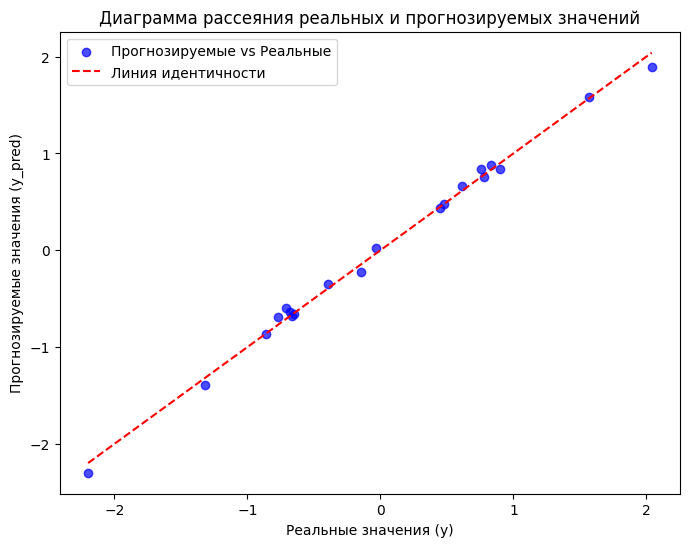

In [38]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии

# import numpy as np
# import statsmodels.api as sm

X1 = x1.flatten()
X2 = x2.flatten()
Y = y.flatten()

# Создаем матрицу признаков X с добавлением столбца единиц для свободного члена
X = np.vstack([np.ones(len(X1)), X1, X2]).T  # Добавление столбца единиц для intercept


# Строим модель линейной регрессии
model = sm.OLS(y, X)
results = model.fit()

# Коэффициенты линейной регрессии
intercept = results.params[0]
slope = results.params[1]

print(f"Коэффициент наклона (beta_1): {slope}")
print(f"Интерсепт (beta_0): {intercept}")



# построение диаграмм рассеяния прогнозных и реальных значений на одном графике

# расчет коэффициентов линейной регрессии 

X1 = x1.flatten()
X2 = x2.flatten()
Y = y.flatten()

# Создаем матрицу признаков X с добавлением столбца единиц для свободного члена
X = np.vstack([np.ones(len(X1)), X1, X2]).T  # Добавление столбца единиц для intercept

# Проверим форму матрицы X
print("Матрица признаков X:")
print(X)

# Рассчитываем коэффициенты регрессии с помощью метода наименьших квадратов
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Результат: коэффициенты линейной регрессии
print("Коэффициенты линейной регрессии:")
print(beta)

# Предсказания на основе вычисленных коэффициентов
Y_pred = X @ beta
print("Предсказанные значения Y:")
print(Y_pred)


# построение диаграммы рассеяния прогнозных и реальных значений на одном графике

# Прогнозируемые значения
y_pred = Y_pred

# Построение диаграммы рассеяния реальных и прогнозируемых значений
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Прогнозируемые vs Реальные', alpha=0.7)
# Добавляем линию идентичности (где реальные значения = прогнозируемые)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Линия идентичности')
# Подписи для осей и легенда
plt.xlabel('Реальные значения (y)')
plt.ylabel('Прогнозируемые значения (y_pred)')
plt.title('Диаграмма рассеяния реальных и прогнозируемых значений')
plt.legend()
# Показываем график
plt.show()

# визуализация прогноза


In [39]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции
# R-squared:
print('coefficient of determination, R^2:', reg_m(y, x).rsquared.round(3))

# расчет F-критерия

# import numpy as np
# import statsmodels.api as sm

# Пример данных
X1 = x1.flatten()
X2 = x2.flatten()
Y = y.flatten()

# Создаем матрицу признаков X с добавлением столбца единиц для свободного члена
X = np.vstack([np.ones(len(X1)), X1, X2]).T

# Множественная линейная регрессия с использованием statsmodels
model = sm.OLS(Y, X)
results = model.fit()

# Выводим summary, которое включает F-статистику
# print(results.summary())

# Если необходимо, можно вручную вычислить F-статистику:

# Остаточная сумма квадратов (SSE)
SSE = np.sum((Y - results.fittedvalues) ** 2)

# Регрессионная сумма квадратов (SQR)
SQR = np.sum((results.fittedvalues - np.mean(Y)) ** 2)

# Общая сумма квадратов (SSR)
SSR = np.sum((Y - np.mean(Y)) ** 2)

# Число наблюдений (n) и количество независимых переменных (k)
n = len(Y)
k = X.shape[1] - 1  # Исключаем столбец для свободного члена

# Средняя сумма квадратов для регрессии (MSR)
MSR = SQR / k

# Средняя ошибка (MSE)
MSE = SSE / (n - k - 1)

# Расчет F-статистики
F = MSR / MSE

print(f"F-статистика: {F}")


print('***********************************************')
# вывод о статистической значимости уравнения в целом
print('вывод о статистической значимости уравнения в целом')
print(reg_m(y, x).summary())
# Получаем p-значения для коэффициентов
p_values = results.pvalues
print("\nP-значения для коэффициентов:")
print(p_values)

# Выводим вывод по значимости
for idx, p_val in enumerate(p_values):
    if p_val < 0.05:
        print(f"Коэффициент {idx} статистически значим (p-value = {p_val:.4f})")
    else:
        print(f"Коэффициент {idx} не статистически значим (p-value = {p_val:.4f})")


coefficient of determination, R^2: 0.996
F-статистика: 1992.6978283137169
***********************************************
вывод о статистической значимости уравнения в целом
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           6.90e-21
Time:                        11:01:37   Log-Likelihood:                 26.236
No. Observations:                  20   AIC:                            -46.47
Df Residuals:                      17   BIC:                            -43.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

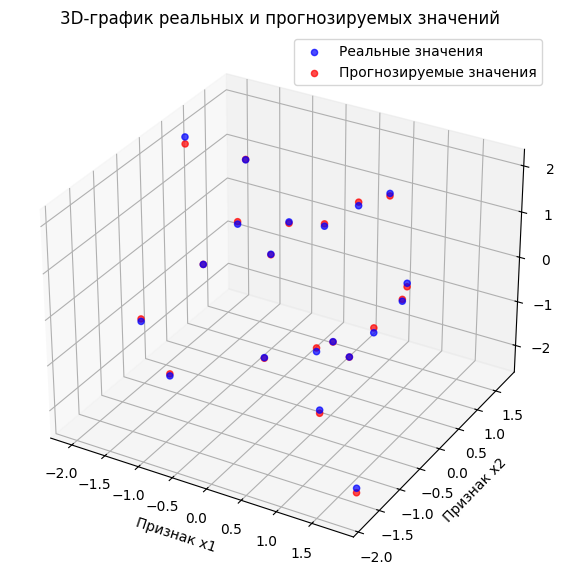

In [40]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Отображение реальных значений
ax.scatter(X[:, 1], X[:, 2], y, color='blue', label='Реальные значения', alpha=0.7)
# Отображение прогнозируемых значений
ax.scatter(X[:, 1], X[:, 2], y_pred, color='red', label='Прогнозируемые значения', alpha=0.7)
# Оси и подписи
ax.set_xlabel('Признак x1')
ax.set_ylabel('Признак x2')
ax.set_zlabel('Целевая переменная y')
# Заголовок и легенда
ax.set_title('3D-график реальных и прогнозируемых значений')
ax.legend()
# Показываем график
plt.show()
